In [1]:

import pandas as pd
import sys
sys.path.append("..")  # 添加上级目录

from config.contract_margin import contract_margin_ratio
from config.contract_multiplier import contract_multipliers
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12  # 字号，你可以调大调小

history=pd.read_csv("../data/9999_1m_0708v3_backtest.csv")
history['datetime'] = pd.to_datetime(history['datetime'])
history=history[(history['datetime'].dt.month>=12)&((history['datetime'].dt.day>=15))]

history.columns=['datetime', 'instrument', 'open', 'close', 'high', 'low', 'volume', 'money',
       'avg', 'high_limit', 'low_limit', 'paused', 'factor', 'open_interest',
       'contract', 'change', 'vwap', 'preclose']

import pandas as pd
df = pd.read_csv("../experiments/futures_fnn_cross_sectional_20250710_160917/test_predictions.csv")
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
merged_df = pd.merge(
    df,
    history,
    on=['datetime', 'instrument'],  # 按这两列合并
    how='inner'  # 合并方式：inner/outer/left/right
)

merged_df['Multiplier'] = merged_df['instrument'].map(contract_multipliers)
merged_df['Margin_ratio'] = merged_df['instrument'].map(contract_margin_ratio)

c:\Users\36119\anaconda3\Lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


      contract direction          entry_time  entry_price           exit_time  \
0  AP9999.XZCE     short 2024-12-18 14:14:00  7280.000000 2024-12-18 14:18:00   
1  AP9999.XZCE      long 2024-12-20 14:48:00  7307.000000 2024-12-20 14:52:00   
2  AP9999.XZCE     short 2024-12-23 09:47:00  7220.000000 2024-12-23 09:51:00   
3  EC9999.XINE      long 2024-12-16 10:16:00  2518.947162 2024-12-16 10:31:00   
4  EC9999.XINE      long 2024-12-16 10:57:00  2541.103846 2024-12-16 11:01:00   

    exit_price    return    gross_pnl         fee      net_pnl         margin  \
0  7264.841777  0.002082  4092.720267  392.710728  3700.009539  196560.000000   
1  7334.000000  0.003695  7290.000000  395.307000  6894.693000  197289.000000   
2  7202.367169  0.002442  4760.864393  389.403914  4371.460480  194940.000000   
3  2518.060825 -0.000352  -584.982308  332.442527  -917.424835  199500.615197   
4  2534.867284 -0.002454 -4053.765432  329.938123 -4383.703556  198206.100000   

   position_size  
0      

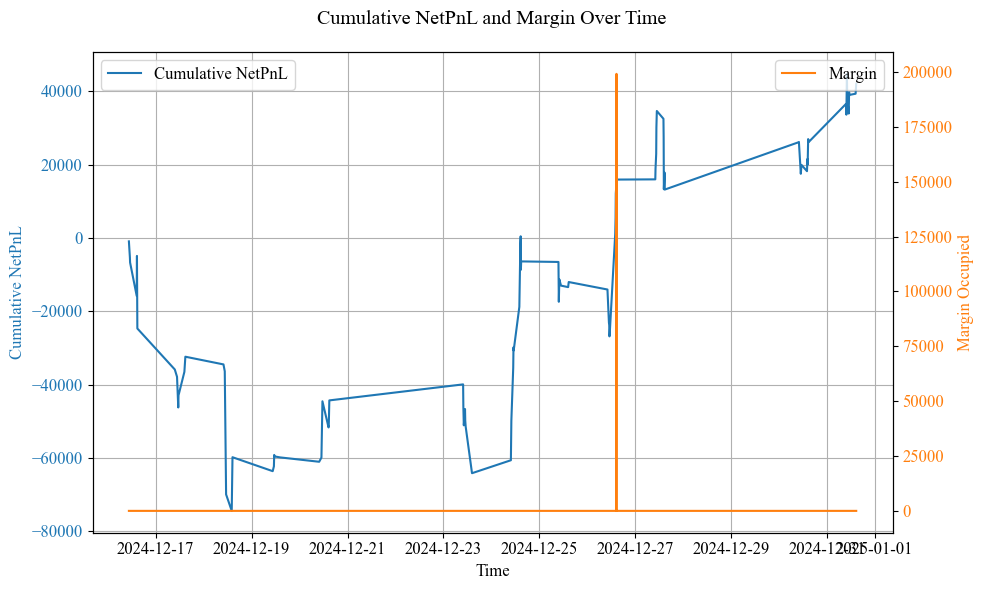

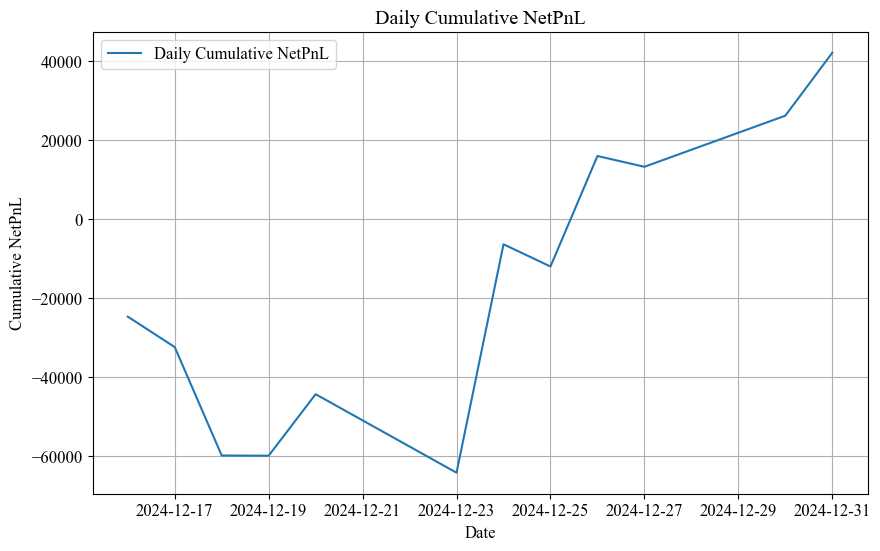

Annualized Return: 44.17%
Annualized Volatility: 18.00%
Sharpe Ratio: 2.45
Max Drawdown: -2.00%


In [2]:
from src.backtest.generate_trade import generate_trade_records
from src.backtest.analyze import analyze_trade_performance
trade_records_df = generate_trade_records(
    merged_df=merged_df,
    long_threshold=0.0008,
    short_threshold=-0.0008,
    fee_rate=1e-4,
    risk_control=True,
    account=2_000_000,
    position_ratio=0.1,
    holding_minutes=5
)

print(trade_records_df.head())



daily_df = analyze_trade_performance(trade_records_df, account=2_000_000)
